## Importing required libraies

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
from collections import Counter
import scipy

## Fetching dataset

In [41]:
congress_data = pd.read_csv('C:/Users/hp/Graphs/congress_network/congress_network/congress.edgelist.txt', sep=" ")
facebook_data = pd.read_csv('C:/Users/hp/Graphs/facebook_combined.txt/facebook_combined.txt', sep=" ")
email_data = pd.read_csv('C:/Users/hp/Graphs/email-Eu-core-department-labels.txt/email-Eu-core-department-labels.txt', sep=" ")

In [42]:
congress_data

,node_1,node_2,weights
0,0,4,0.002105
1,0,12,0.002105
2,0,18,0.002105
3,0,25,0.004211
4,0,30,0.002105
...,...,...,...
13284,456,435,0.009615
13285,456,442,0.009615
13286,456,449,0.009615
13287,456,453,0.009615


In [43]:
facebook_data

,node1,node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [44]:
email_data

,Node_1,Node_2
0,0,1
1,0,2
2,1,1
3,2,21
4,3,21
...,...,...
1001,1000,4
1002,1001,21
1003,1002,1
1004,1003,6


## Creating 3 Real World graph from the dataset

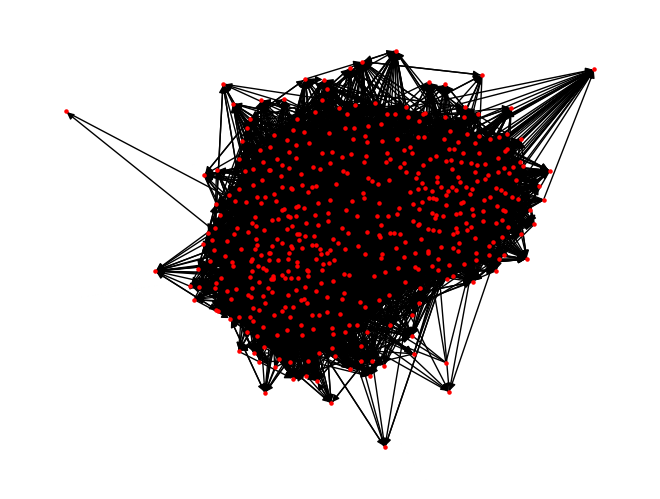

In [45]:
congress_G = nx.from_pandas_edgelist(congress_data, source="node_1", target="node_2", edge_attr="weights", create_using=nx.DiGraph())
nx.draw(congress_G, node_size=5, node_color = 'red', edge_color = 'black')
# nx.draw_networkx_edge_labels(congress_G, pos, edge_labels=edge_weights, font_size=5)

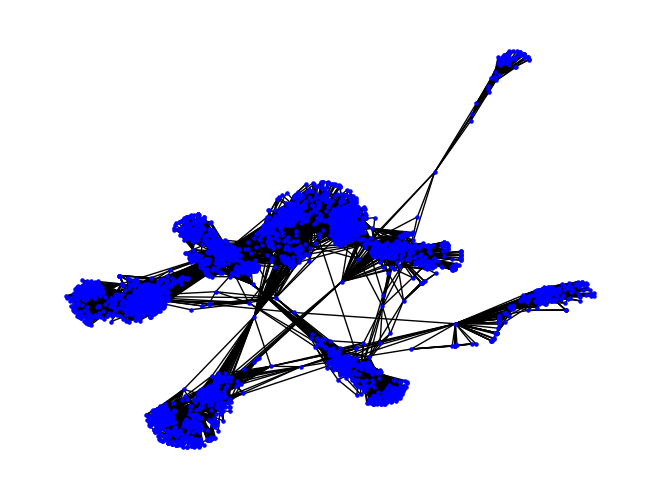

In [46]:
facebook_G = nx.from_pandas_edgelist(facebook_data, source="node1", target="node2", create_using=nx.Graph())
nx.draw(facebook_G, node_size=5, node_color = 'blue', edge_color = 'black')

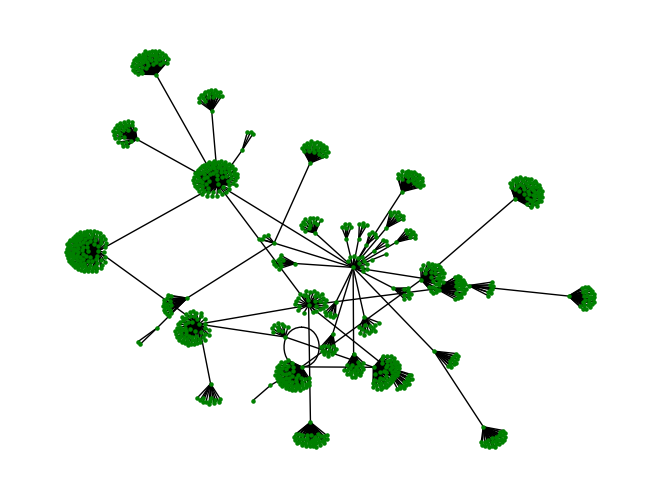

In [47]:
email_G = nx.from_pandas_edgelist(email_data, source="Node_1", target="Node_2", create_using=nx.Graph())
nx.draw(email_G, node_size=5, node_color = 'green', edge_color = 'black')

## Calculating average degree and creating corresponding synthetic graph

In [48]:
degree_values_congress = [v for k, v in congress_G.degree()]
average_degree_congress_G = sum(degree_values_congress)/nx.number_of_nodes(congress_G)
average_degree_congress_G

55.95368421052632

In [49]:
n_congress = nx.number_of_nodes(congress_G)
p_congress = average_degree_congress_G/(n_congress-1)
congress_Gnp = nx.gnp_random_graph(n_congress, p_congress, directed=True)
congress_watts = nx.watts_strogatz_graph(n_congress, int(average_degree_congress_G), p_congress)

In [50]:
degree_values_Gnp = [v for k, v in congress_Gnp.degree()]
average_degree_congress_Gnp = sum(degree_values_Gnp)/nx.number_of_nodes(congress_Gnp)
degree_values_watts = [v for k, v in congress_watts.degree()]
average_degree_congress_watts = sum(degree_values_watts)/nx.number_of_nodes(congress_watts)

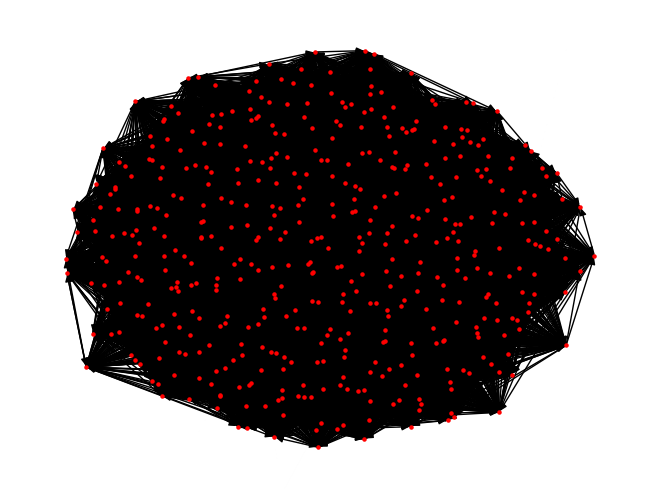

In [51]:
nx.draw(congress_Gnp, node_size=5, node_color = 'red', edge_color = 'black')

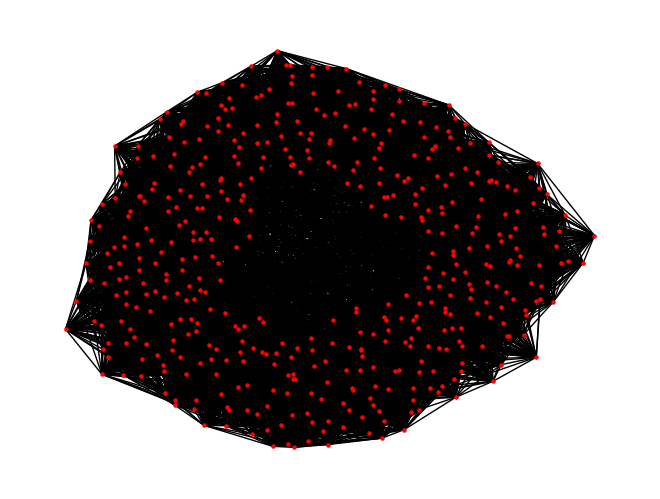

In [52]:
nx.draw(congress_watts, node_size=5, node_color = 'red', edge_color = 'black')

In [53]:
degree_values_facebook = [v for k, v in facebook_G.degree()]
average_degree_facebook_G = sum(degree_values_facebook)/nx.number_of_nodes(facebook_G)
average_degree_facebook_G

43.69101262688784

In [54]:
n_facebook = nx.number_of_nodes(facebook_G)
p_facebook = average_degree_facebook_G/(n_facebook-1)
facebook_Gnp = nx.gnp_random_graph(n_facebook, p_facebook, directed=False)
facebook_watts = nx.watts_strogatz_graph(n_facebook, int(average_degree_facebook_G), p_facebook)

In [55]:
degree_values_Gnp = [v for k, v in facebook_Gnp.degree()]
average_degree_facebook_Gnp = sum(degree_values_Gnp)/nx.number_of_nodes(facebook_Gnp)
degree_values_watts = [v for k, v in facebook_watts.degree()]
average_degree_facebook_watts = sum(degree_values_watts)/nx.number_of_nodes(facebook_watts)

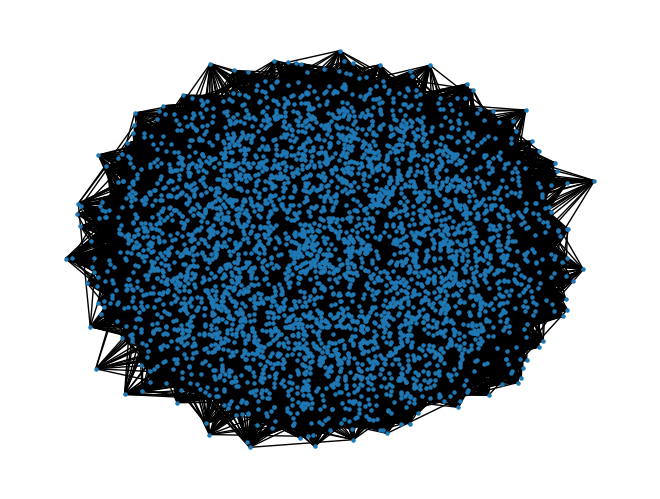

In [56]:
nx.draw(facebook_Gnp, node_size=5, edge_color = 'black')

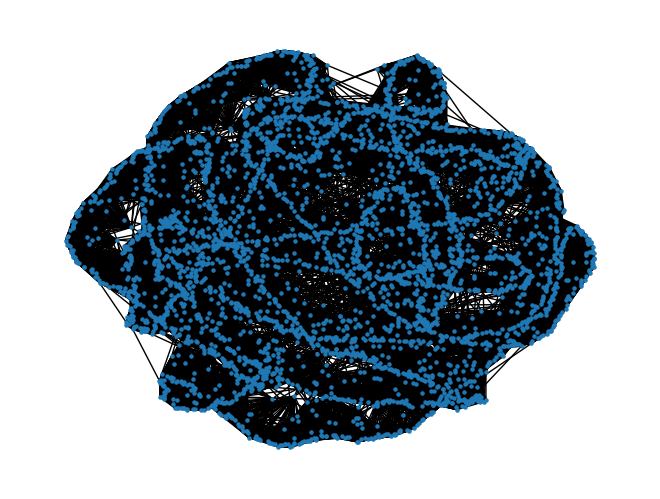

In [57]:
nx.draw(facebook_watts, node_size=5, edge_color = 'black')

In [58]:
degree_values_congress = [v for k, v in email_G.degree()]
average_degree_email_G = sum(degree_values_congress)/nx.number_of_nodes(email_G)
average_degree_email_G

2.0019900497512437

In [59]:
n_email = nx.number_of_nodes(email_G)
p_email = average_degree_email_G/(n_email-1)
email_Gnp = nx.gnp_random_graph(n_email, p_email, directed=False)
email_watts = nx.watts_strogatz_graph(n_email, int(average_degree_email_G), p_email)

In [60]:
degree_values_Gnp = [v for k, v in email_Gnp.degree()]
average_degree_email_Gnp = sum(degree_values_Gnp)/nx.number_of_nodes(email_Gnp)
degree_values_watts = [v for k, v in email_watts.degree()]
average_degree_email_watts = sum(degree_values_watts)/nx.number_of_nodes(email_watts)

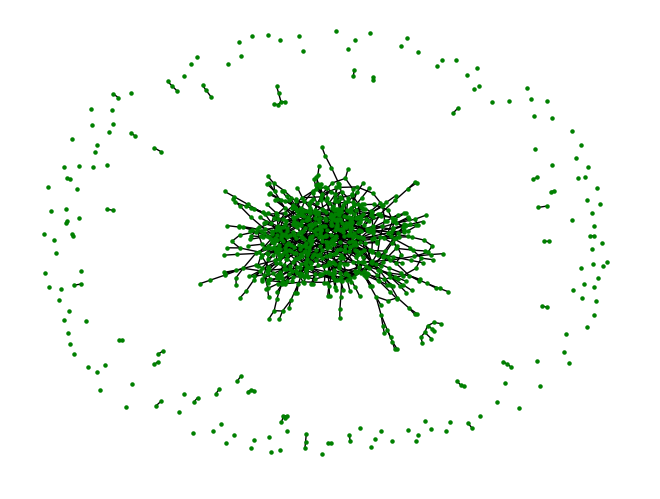

In [61]:
nx.draw(email_Gnp, node_size=5, node_color='green', edge_color = 'black')

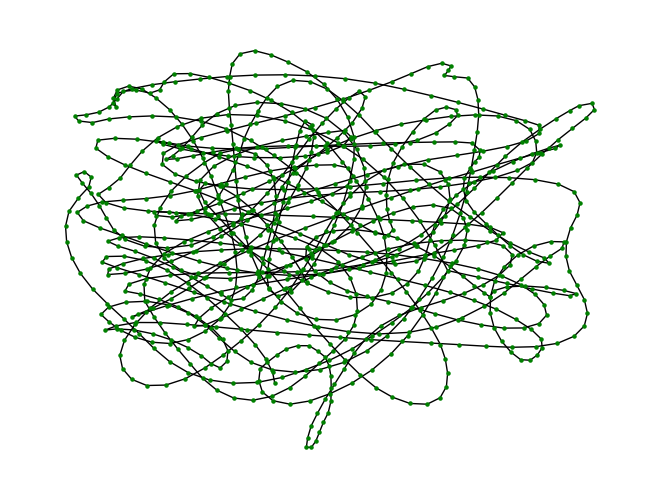

In [62]:
nx.draw(email_watts, node_color='green', node_size=5, edge_color = 'black')

## Calculating Degree Centralities of all 9 graphs

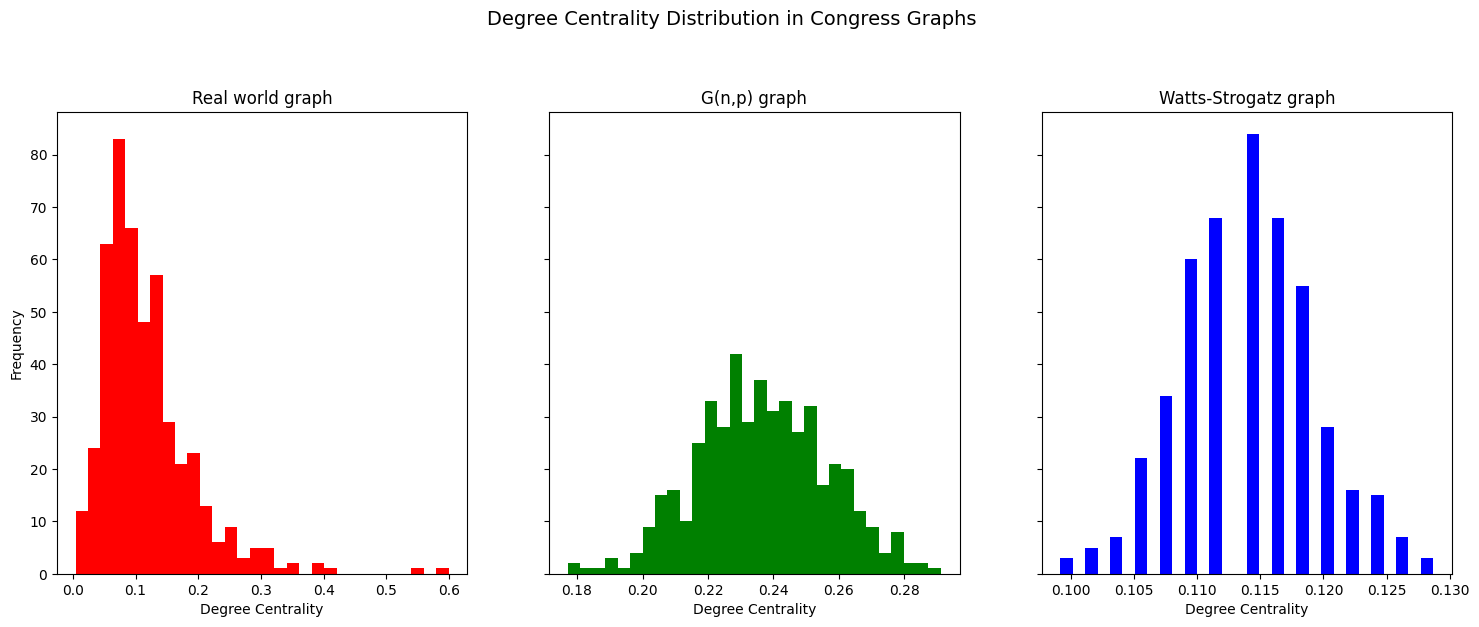

In [63]:
# Calculate degree centralities
degree_centrality_congress_G = nx.degree_centrality(congress_G)
degree_centrality_congress_Gnp = nx.degree_centrality(congress_Gnp)
degree_centrality_congress_watts = nx.degree_centrality(congress_watts)

# Get degree centrality values
congress_G_Y = list(degree_centrality_congress_G.values())
congress_Gnp_Y = list(degree_centrality_congress_Gnp.values())
congress_watts_Y = list(degree_centrality_congress_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(congress_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Degree Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(congress_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Degree Centrality')

axs[2].hist(congress_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Degree Centrality')

plt.suptitle("Degree Centrality Distribution in Congress Graphs", y=1.05, fontsize=14)
plt.show()


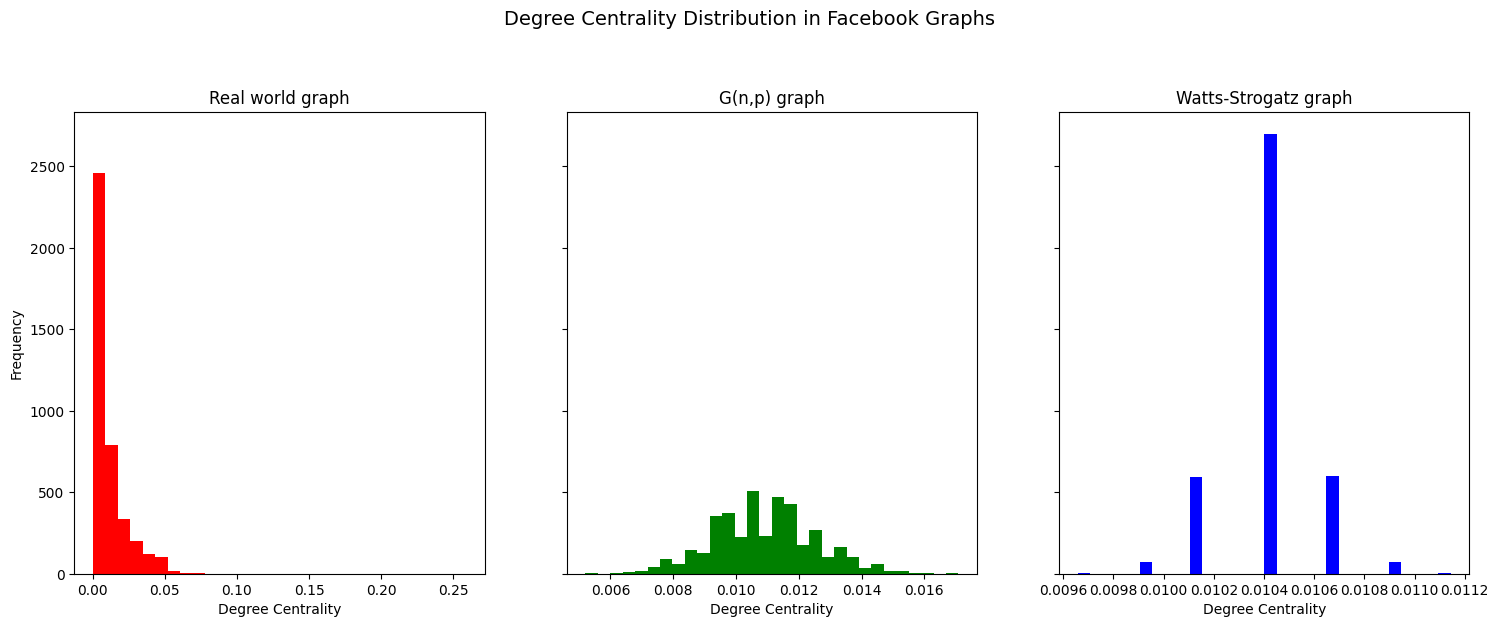

In [64]:
# Calculate degree centralities
degree_centrality_facebook_G = nx.degree_centrality(facebook_G)
degree_centrality_facebook_Gnp = nx.degree_centrality(facebook_Gnp)
degree_centrality_facebook_watts = nx.degree_centrality(facebook_watts)

# Get degree centrality values
facebook_G_Y = list(degree_centrality_facebook_G.values())
facebook_Gnp_Y = list(degree_centrality_facebook_Gnp.values())
facebook_watts_Y = list(degree_centrality_facebook_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(facebook_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Degree Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(facebook_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Degree Centrality')

axs[2].hist(facebook_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Degree Centrality')

plt.suptitle("Degree Centrality Distribution in Facebook Graphs", y=1.05, fontsize=14)
plt.show()


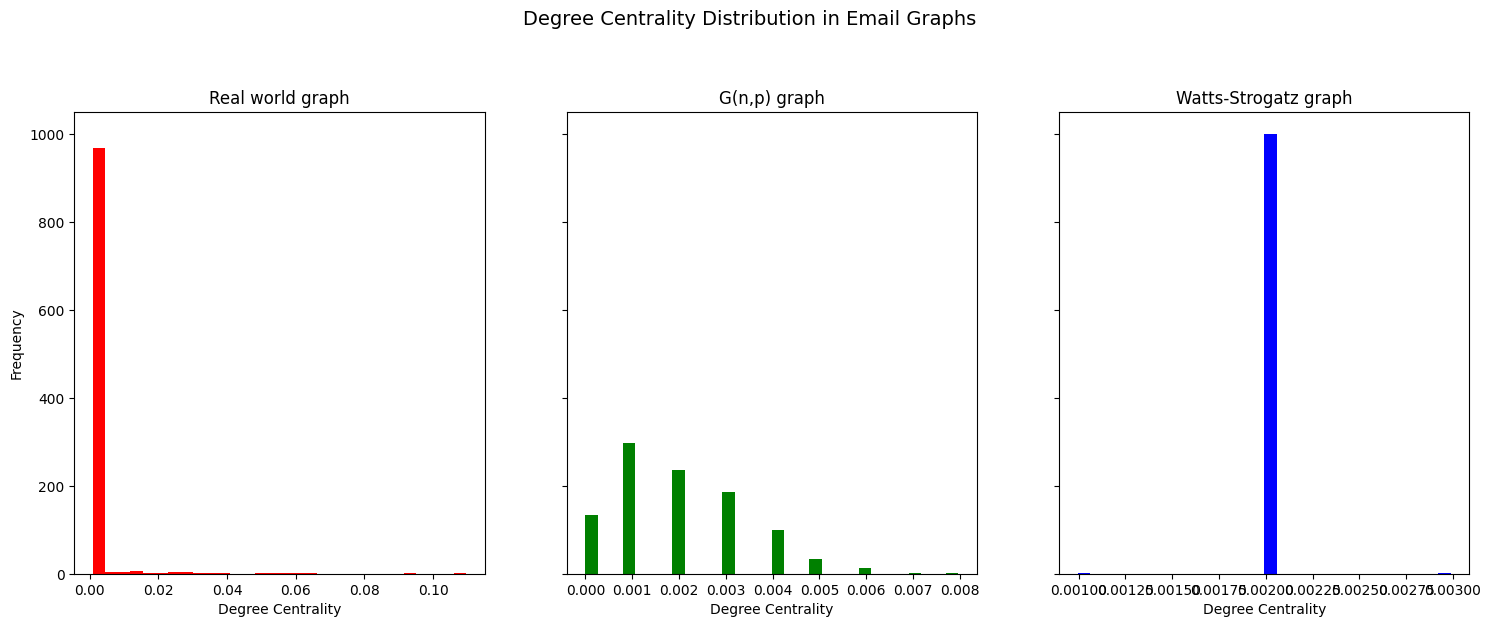

In [65]:
# Calculate degree centralities
degree_centrality_email_G = nx.degree_centrality(email_G)
degree_centrality_email_Gnp = nx.degree_centrality(email_Gnp)
degree_centrality_email_watts = nx.degree_centrality(email_watts)

# Get degree centrality values
email_G_Y = list(degree_centrality_email_G.values())
email_Gnp_Y = list(degree_centrality_email_Gnp.values())
email_watts_Y = list(degree_centrality_email_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(email_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Degree Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(email_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Degree Centrality')

axs[2].hist(email_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Degree Centrality')

plt.suptitle("Degree Centrality Distribution in Email Graphs", y=1.05, fontsize=14)
plt.show()


## Calculating Betweenness Centralities of all 9 graphs

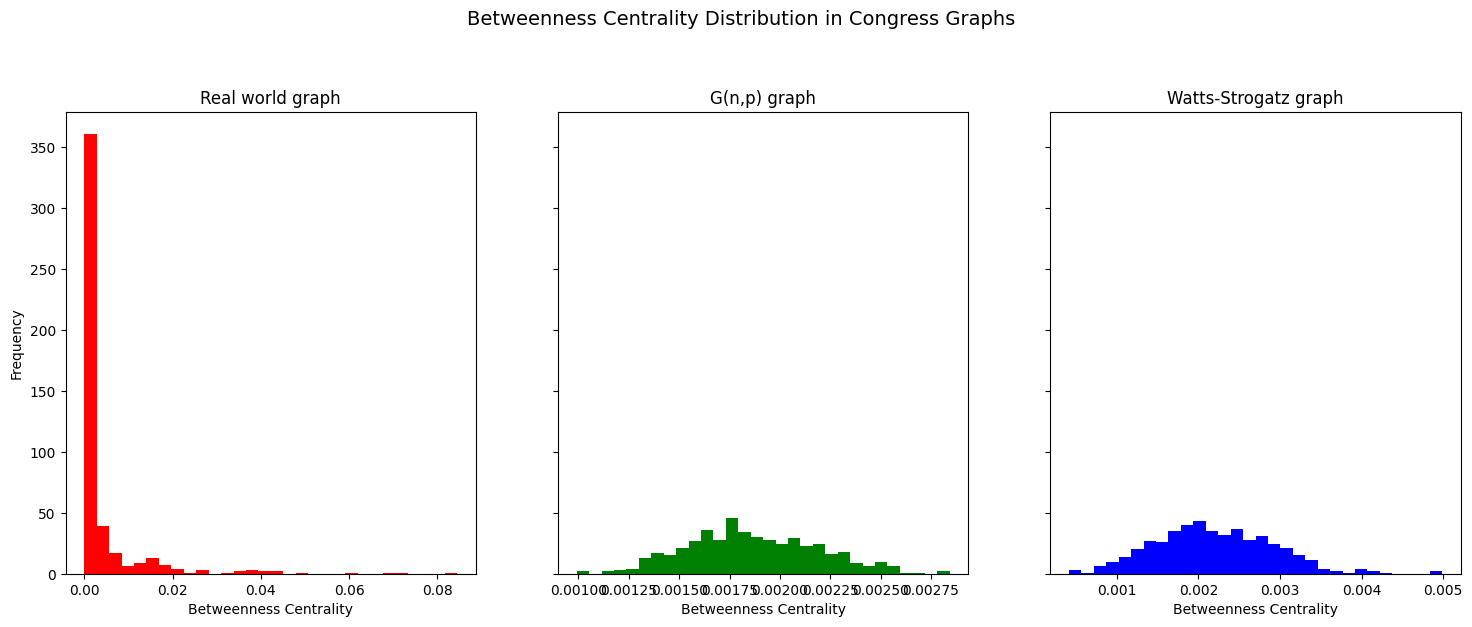

In [66]:
# Calculate betweenness centralities
betweenness_centrality_congress_G = nx.betweenness_centrality(congress_G, weight='weights')
betweenness_centrality_congress_Gnp = nx.betweenness_centrality(congress_Gnp, weight='weights')
betweenness_centrality_congress_watts = nx.betweenness_centrality(congress_watts, weight='weights')

# Get betweenness centrality values
congress_G_Y = list(betweenness_centrality_congress_G.values())
congress_Gnp_Y = list(betweenness_centrality_congress_Gnp.values())
congress_watts_Y = list(betweenness_centrality_congress_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(congress_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Betweenness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(congress_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Betweenness Centrality')

axs[2].hist(congress_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Betweenness Centrality')

plt.suptitle("Betweenness Centrality Distribution in Congress Graphs", y=1.05, fontsize=14)
plt.show()


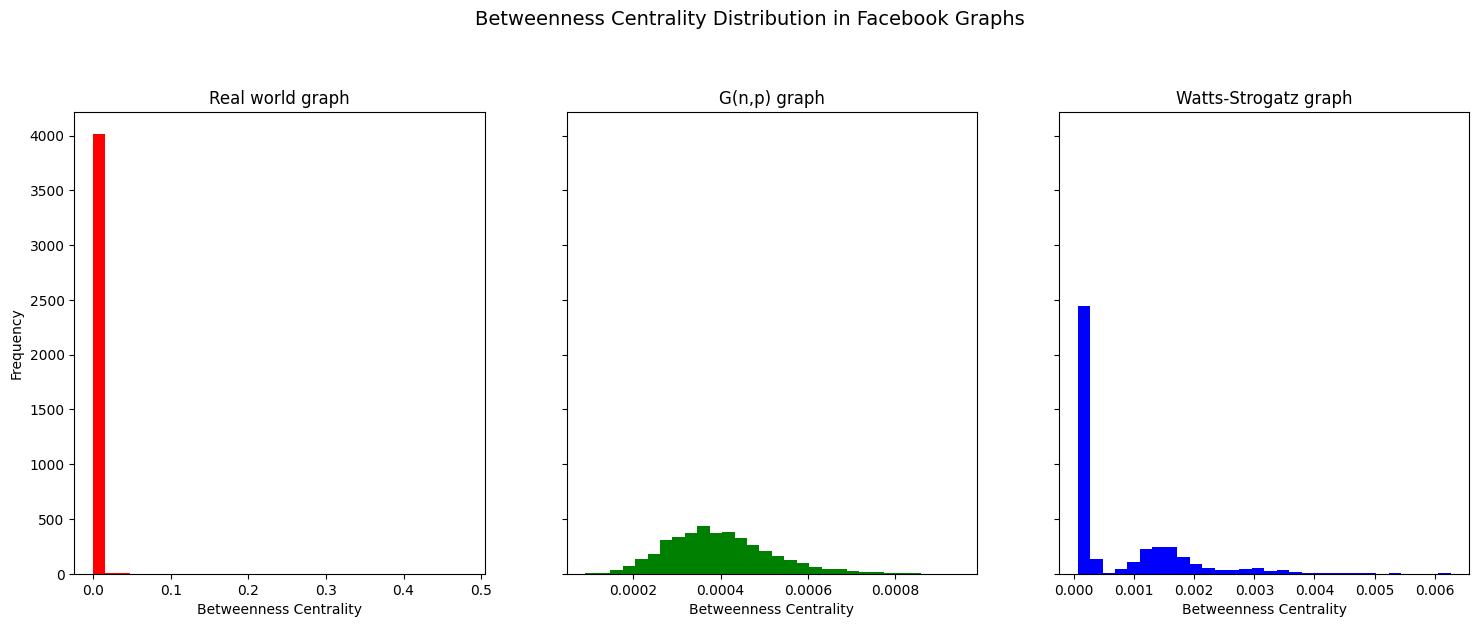

In [67]:
# Calculate betweenness centralities
betweenness_centrality_facebook_G = nx.betweenness_centrality(facebook_G)
betweenness_centrality_facebook_Gnp = nx.betweenness_centrality(facebook_Gnp)
betweenness_centrality_facebook_watts = nx.betweenness_centrality(facebook_watts)

# Get betweenness centrality values
facebook_G_Y = list(betweenness_centrality_facebook_G.values())
facebook_Gnp_Y = list(betweenness_centrality_facebook_Gnp.values())
facebook_watts_Y = list(betweenness_centrality_facebook_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(facebook_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Betweenness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(facebook_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Betweenness Centrality')

axs[2].hist(facebook_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Betweenness Centrality')

plt.suptitle("Betweenness Centrality Distribution in Facebook Graphs", y=1.05, fontsize=14)
plt.show()


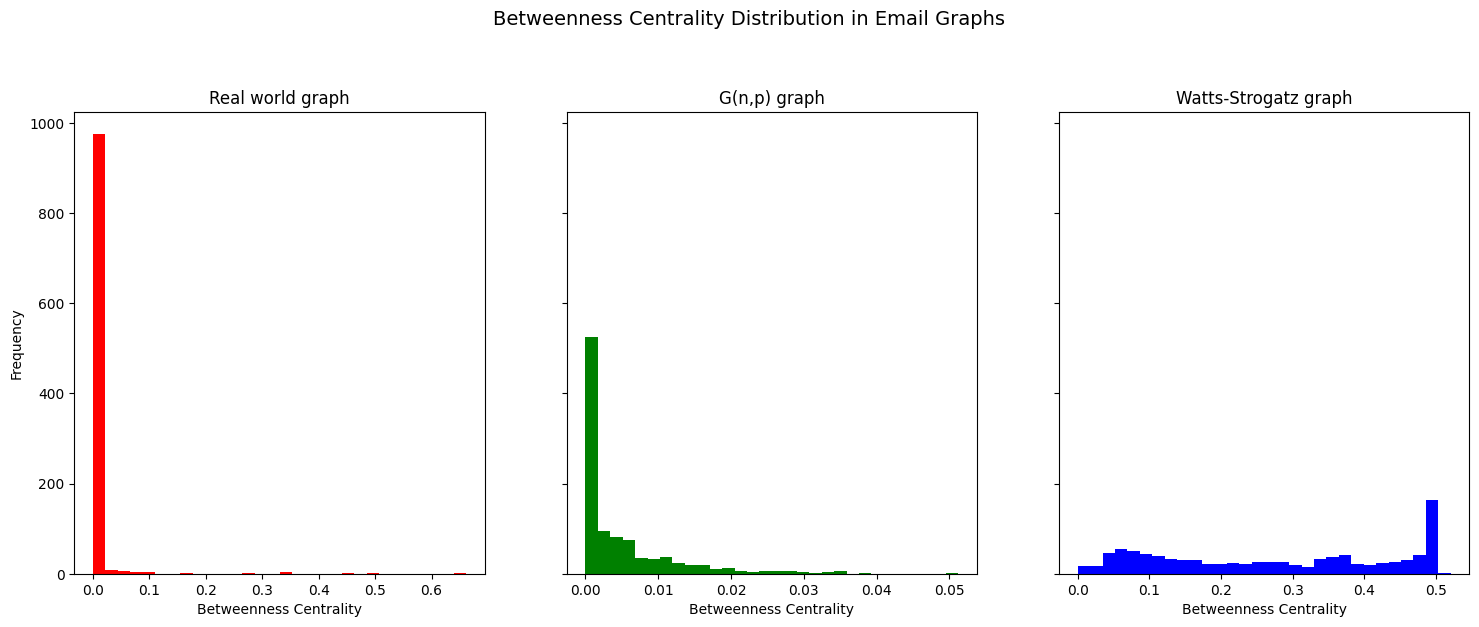

In [68]:
# Calculate betweenness centralities
betweenness_centrality_email_G = nx.betweenness_centrality(email_G)
betweenness_centrality_email_Gnp = nx.betweenness_centrality(email_Gnp)
betweenness_centrality_email_watts = nx.betweenness_centrality(email_watts)

# Get betweenness centrality values
email_G_Y = list(betweenness_centrality_email_G.values())
email_Gnp_Y = list(betweenness_centrality_email_Gnp.values())
email_watts_Y = list(betweenness_centrality_email_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(email_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Betweenness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(email_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Betweenness Centrality')

axs[2].hist(email_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Betweenness Centrality')

plt.suptitle("Betweenness Centrality Distribution in Email Graphs", y=1.05, fontsize=14)
plt.show()

## Calculating Closeness Centralities of all 9 graphs

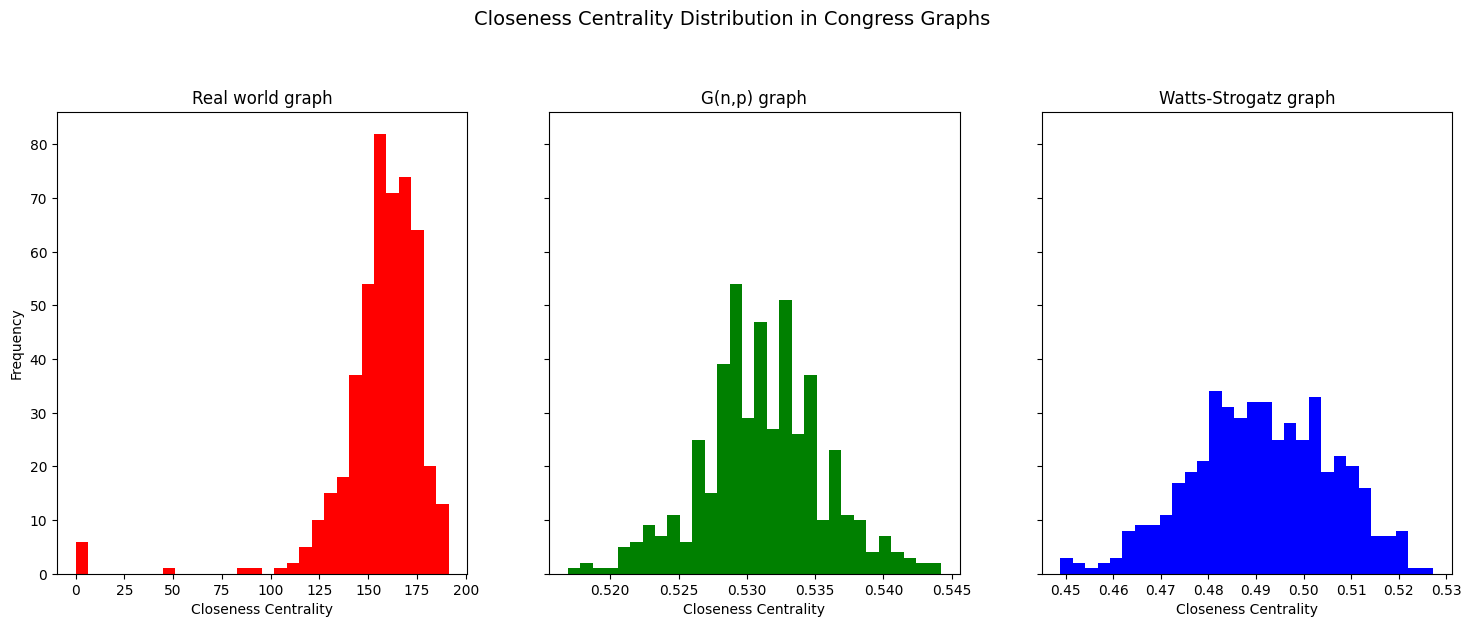

In [69]:
# Calculate closeness centralities
closeness_centrality_congress_G = nx.closeness_centrality(congress_G, distance='weights')
closeness_centrality_congress_Gnp = nx.closeness_centrality(congress_Gnp, distance='weights')
closeness_centrality_congress_watts = nx.closeness_centrality(congress_watts, distance='weights')

# Get closeness centrality values
congress_G_Y = list(closeness_centrality_congress_G.values())
congress_Gnp_Y = list(closeness_centrality_congress_Gnp.values())
congress_watts_Y = list(closeness_centrality_congress_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(congress_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Closeness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(congress_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Closeness Centrality')

axs[2].hist(congress_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Closeness Centrality')

plt.suptitle("Closeness Centrality Distribution in Congress Graphs", y=1.05, fontsize=14)
plt.show()

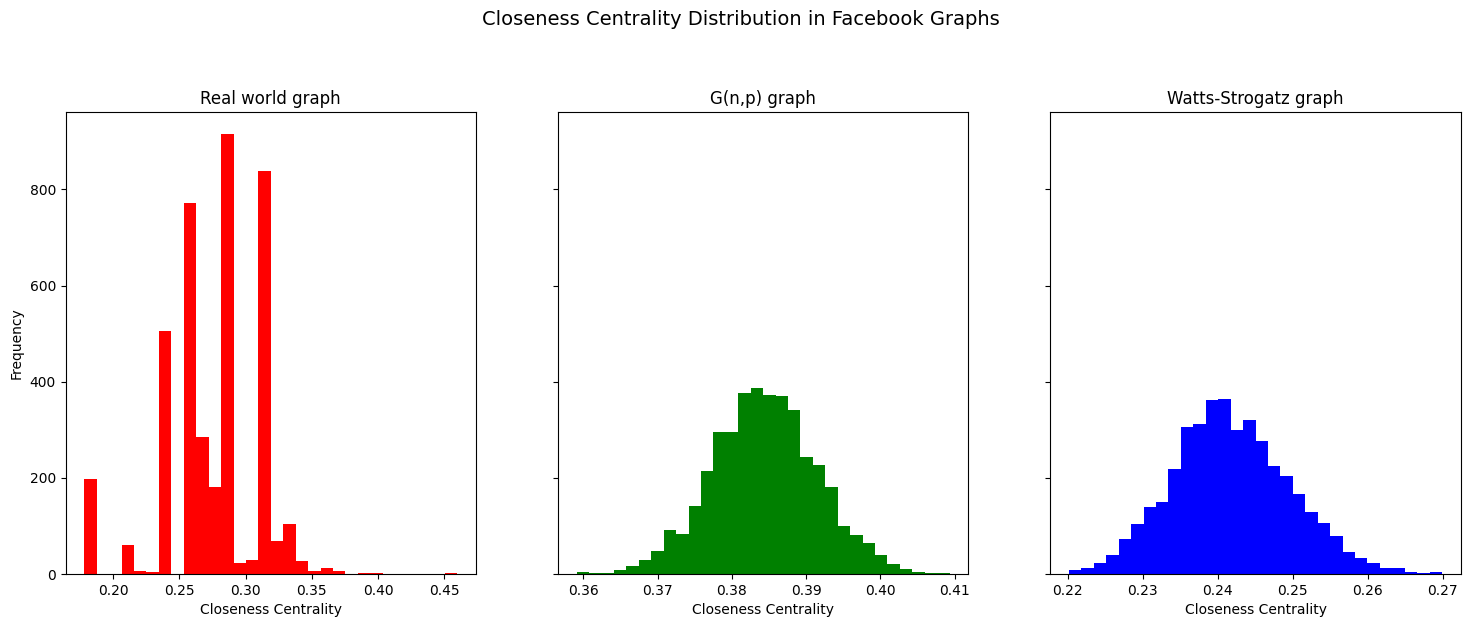

In [70]:
# Calculate closeness centralities
closeness_centrality_facebook_G = nx.closeness_centrality(facebook_G)
closeness_centrality_facebook_Gnp = nx.closeness_centrality(facebook_Gnp)
closeness_centrality_facebook_watts = nx.closeness_centrality(facebook_watts)

# Get closeness centrality values
facebook_G_Y = list(closeness_centrality_facebook_G.values())
facebook_Gnp_Y = list(closeness_centrality_facebook_Gnp.values())
facebook_watts_Y = list(closeness_centrality_facebook_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(facebook_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Closeness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(facebook_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Closeness Centrality')

axs[2].hist(facebook_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Closeness Centrality')

plt.suptitle("Closeness Centrality Distribution in Facebook Graphs", y=1.05, fontsize=14)
plt.show()

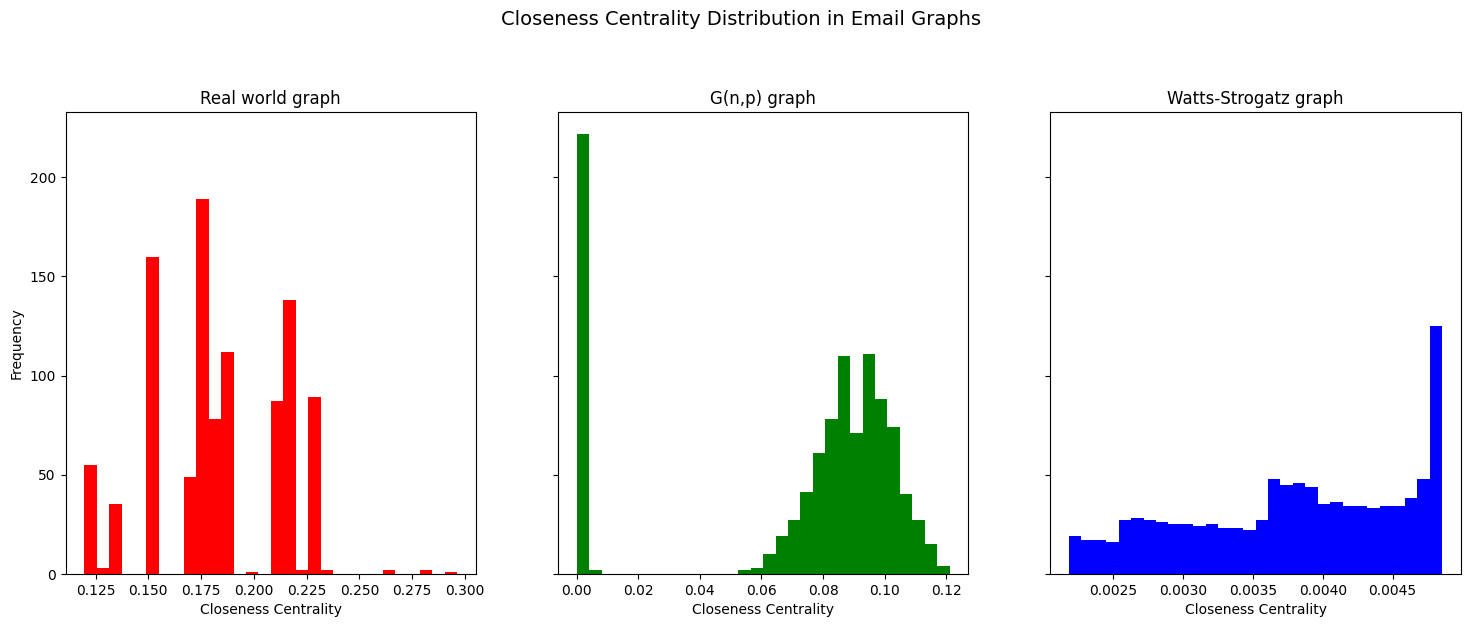

In [71]:
# Calculate closeness centralities
closeness_centrality_email_G = nx.closeness_centrality(email_G)
closeness_centrality_email_Gnp = nx.closeness_centrality(email_Gnp)
closeness_centrality_email_watts = nx.closeness_centrality(email_watts)

# Get closeness centrality values
email_G_Y = list(closeness_centrality_email_G.values())
email_Gnp_Y = list(closeness_centrality_email_Gnp.values())
email_watts_Y = list(closeness_centrality_email_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(email_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Closeness Centrality')
axs[0].set_ylabel('Frequency')

axs[1].hist(email_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Closeness Centrality')

axs[2].hist(email_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Closeness Centrality')

plt.suptitle("Closeness Centrality Distribution in Email Graphs", y=1.05, fontsize=14)
plt.show()

## Calculating Clustering Coefficients of all 9 graphs

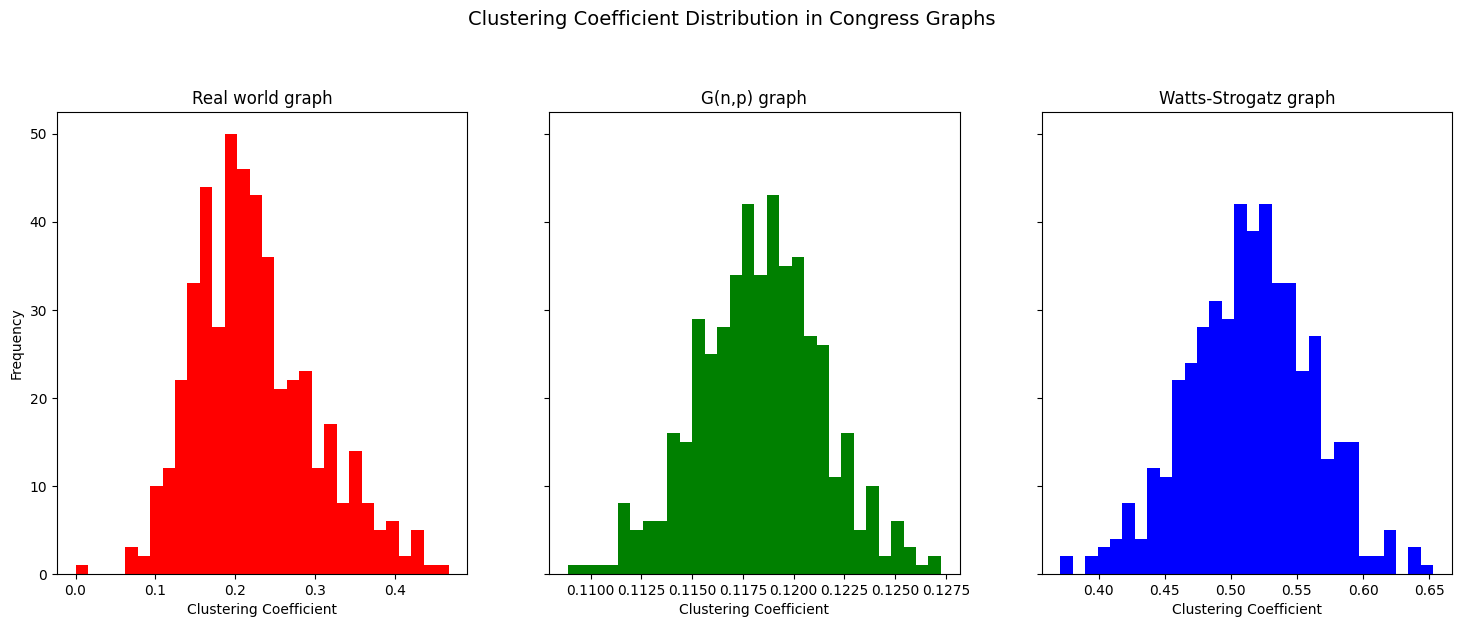

In [72]:
# Calculate clustering coefficients
clustering_coefficient_congress_G = nx.clustering(congress_G)
clustering_coefficient_congress_Gnp = nx.clustering(congress_Gnp)
clustering_coefficient_congress_watts = nx.clustering(congress_watts)

# Get clustering coefficient values
congress_G_Y = list(clustering_coefficient_congress_G.values())
congress_Gnp_Y = list(clustering_coefficient_congress_Gnp.values())
congress_watts_Y = list(clustering_coefficient_congress_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(congress_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Clustering Coefficient')
axs[0].set_ylabel('Frequency')

axs[1].hist(congress_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Clustering Coefficient')

axs[2].hist(congress_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Clustering Coefficient')

plt.suptitle("Clustering Coefficient Distribution in Congress Graphs", y=1.05, fontsize=14)
plt.show()

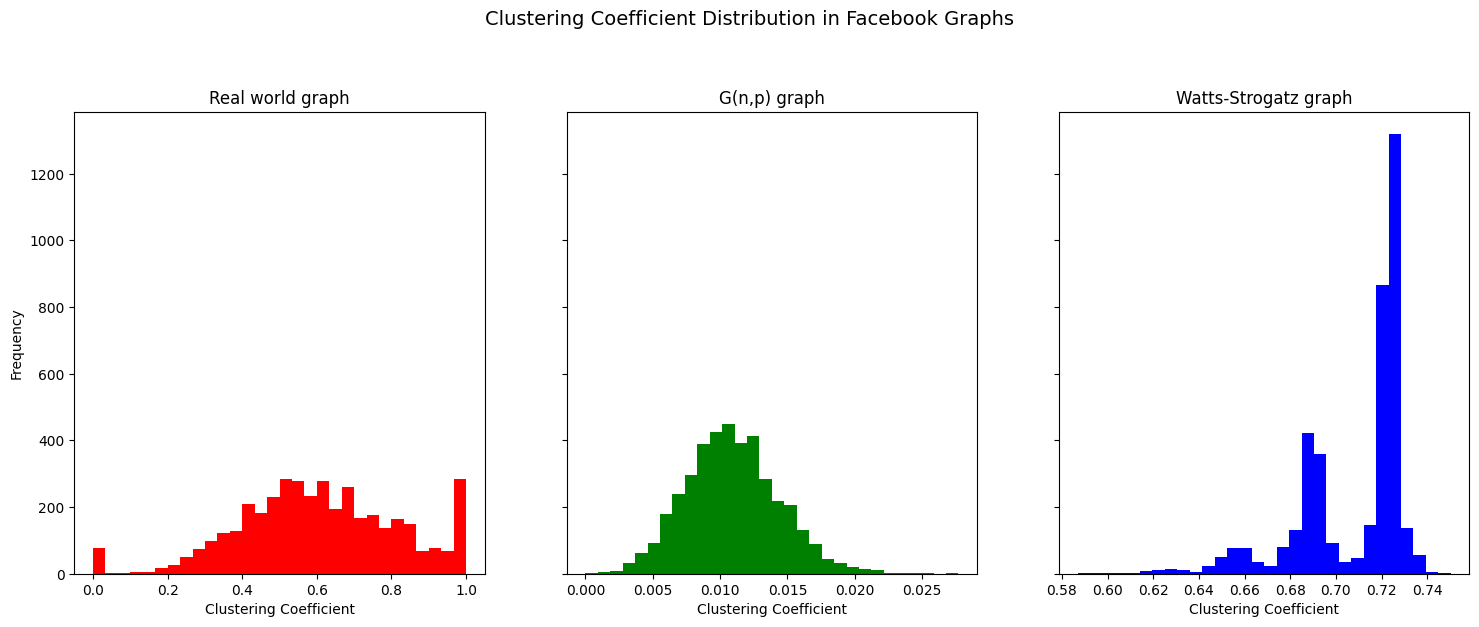

In [73]:
# Calculate clustering coefficients
clustering_coefficient_facebook_G = nx.clustering(facebook_G)
clustering_coefficient_facebook_Gnp = nx.clustering(facebook_Gnp)
clustering_coefficient_facebook_watts = nx.clustering(facebook_watts)

# Get clustering coefficient values
facebook_G_Y = list(clustering_coefficient_facebook_G.values())
facebook_Gnp_Y = list(clustering_coefficient_facebook_Gnp.values())
facebook_watts_Y = list(clustering_coefficient_facebook_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(facebook_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Clustering Coefficient')
axs[0].set_ylabel('Frequency')

axs[1].hist(facebook_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Clustering Coefficient')

axs[2].hist(facebook_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Clustering Coefficient')

plt.suptitle("Clustering Coefficient Distribution in Facebook Graphs", y=1.05, fontsize=14)
plt.show()

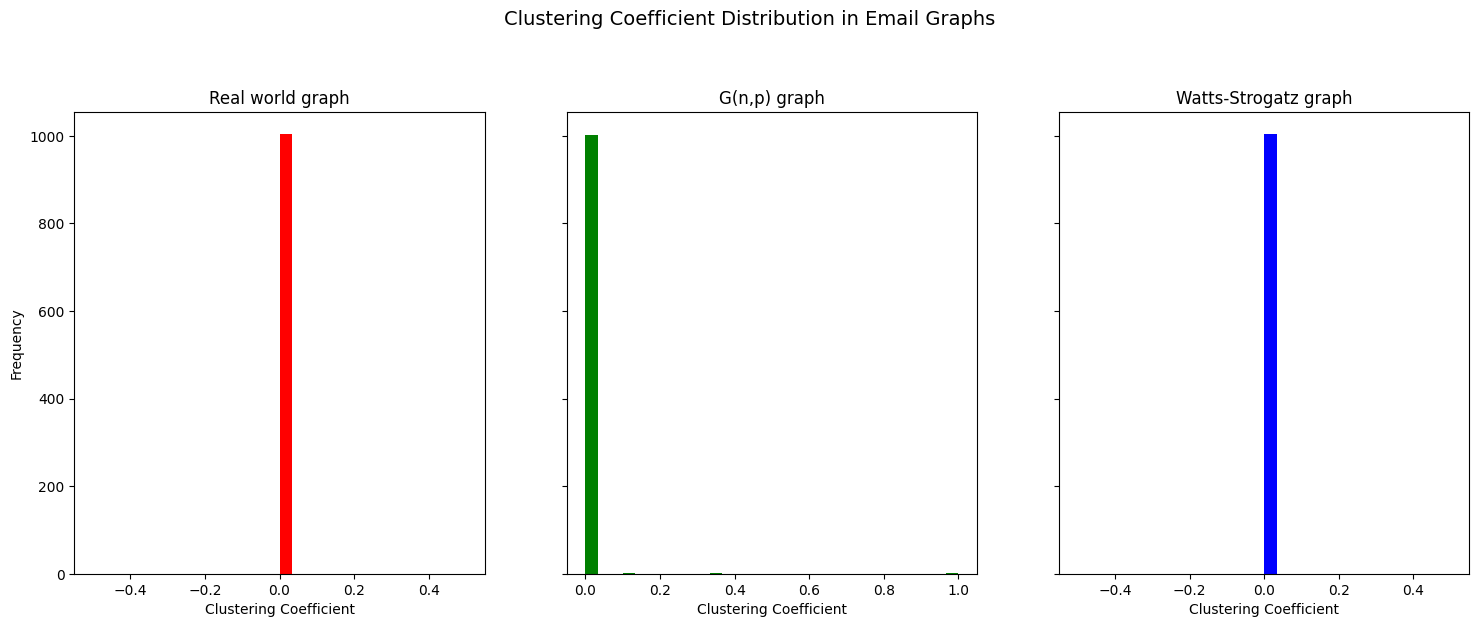

In [74]:
# Calculate clustering coefficients
clustering_coefficient_email_G = nx.clustering(email_G)
clustering_coefficient_email_Gnp = nx.clustering(email_Gnp)
clustering_coefficient_email_watts = nx.clustering(email_watts)

# Get clustering coefficient values
email_G_Y = list(clustering_coefficient_email_G.values())
email_Gnp_Y = list(clustering_coefficient_email_Gnp.values())
email_watts_Y = list(clustering_coefficient_email_watts.values())

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for all three graphs
axs[0].hist(email_G_Y, bins=30, color='red')
axs[0].set_title('Real world graph')
axs[0].set_xlabel('Clustering Coefficient')
axs[0].set_ylabel('Frequency')

axs[1].hist(email_Gnp_Y, bins=30, color='green')
axs[1].set_title('G(n,p) graph')
axs[1].set_xlabel('Clustering Coefficient')

axs[2].hist(email_watts_Y, bins=30, color='blue')
axs[2].set_title('Watts-Strogatz graph')
axs[2].set_xlabel('Clustering Coefficient')

plt.suptitle("Clustering Coefficient Distribution in Email Graphs", y=1.05, fontsize=14)
plt.show()

## Calculating Average PathLength of all 9 graphs

Average path length of the largest strongly connected component of the real-world congress graph is: 2.3548922056384742
Average path length of the largest weakly connected component of G(n,p) congress graph is: 1.882846990894959
Average path length of the largest connected component of the Watts-Strogatz congress graph is: 2.037432822562736


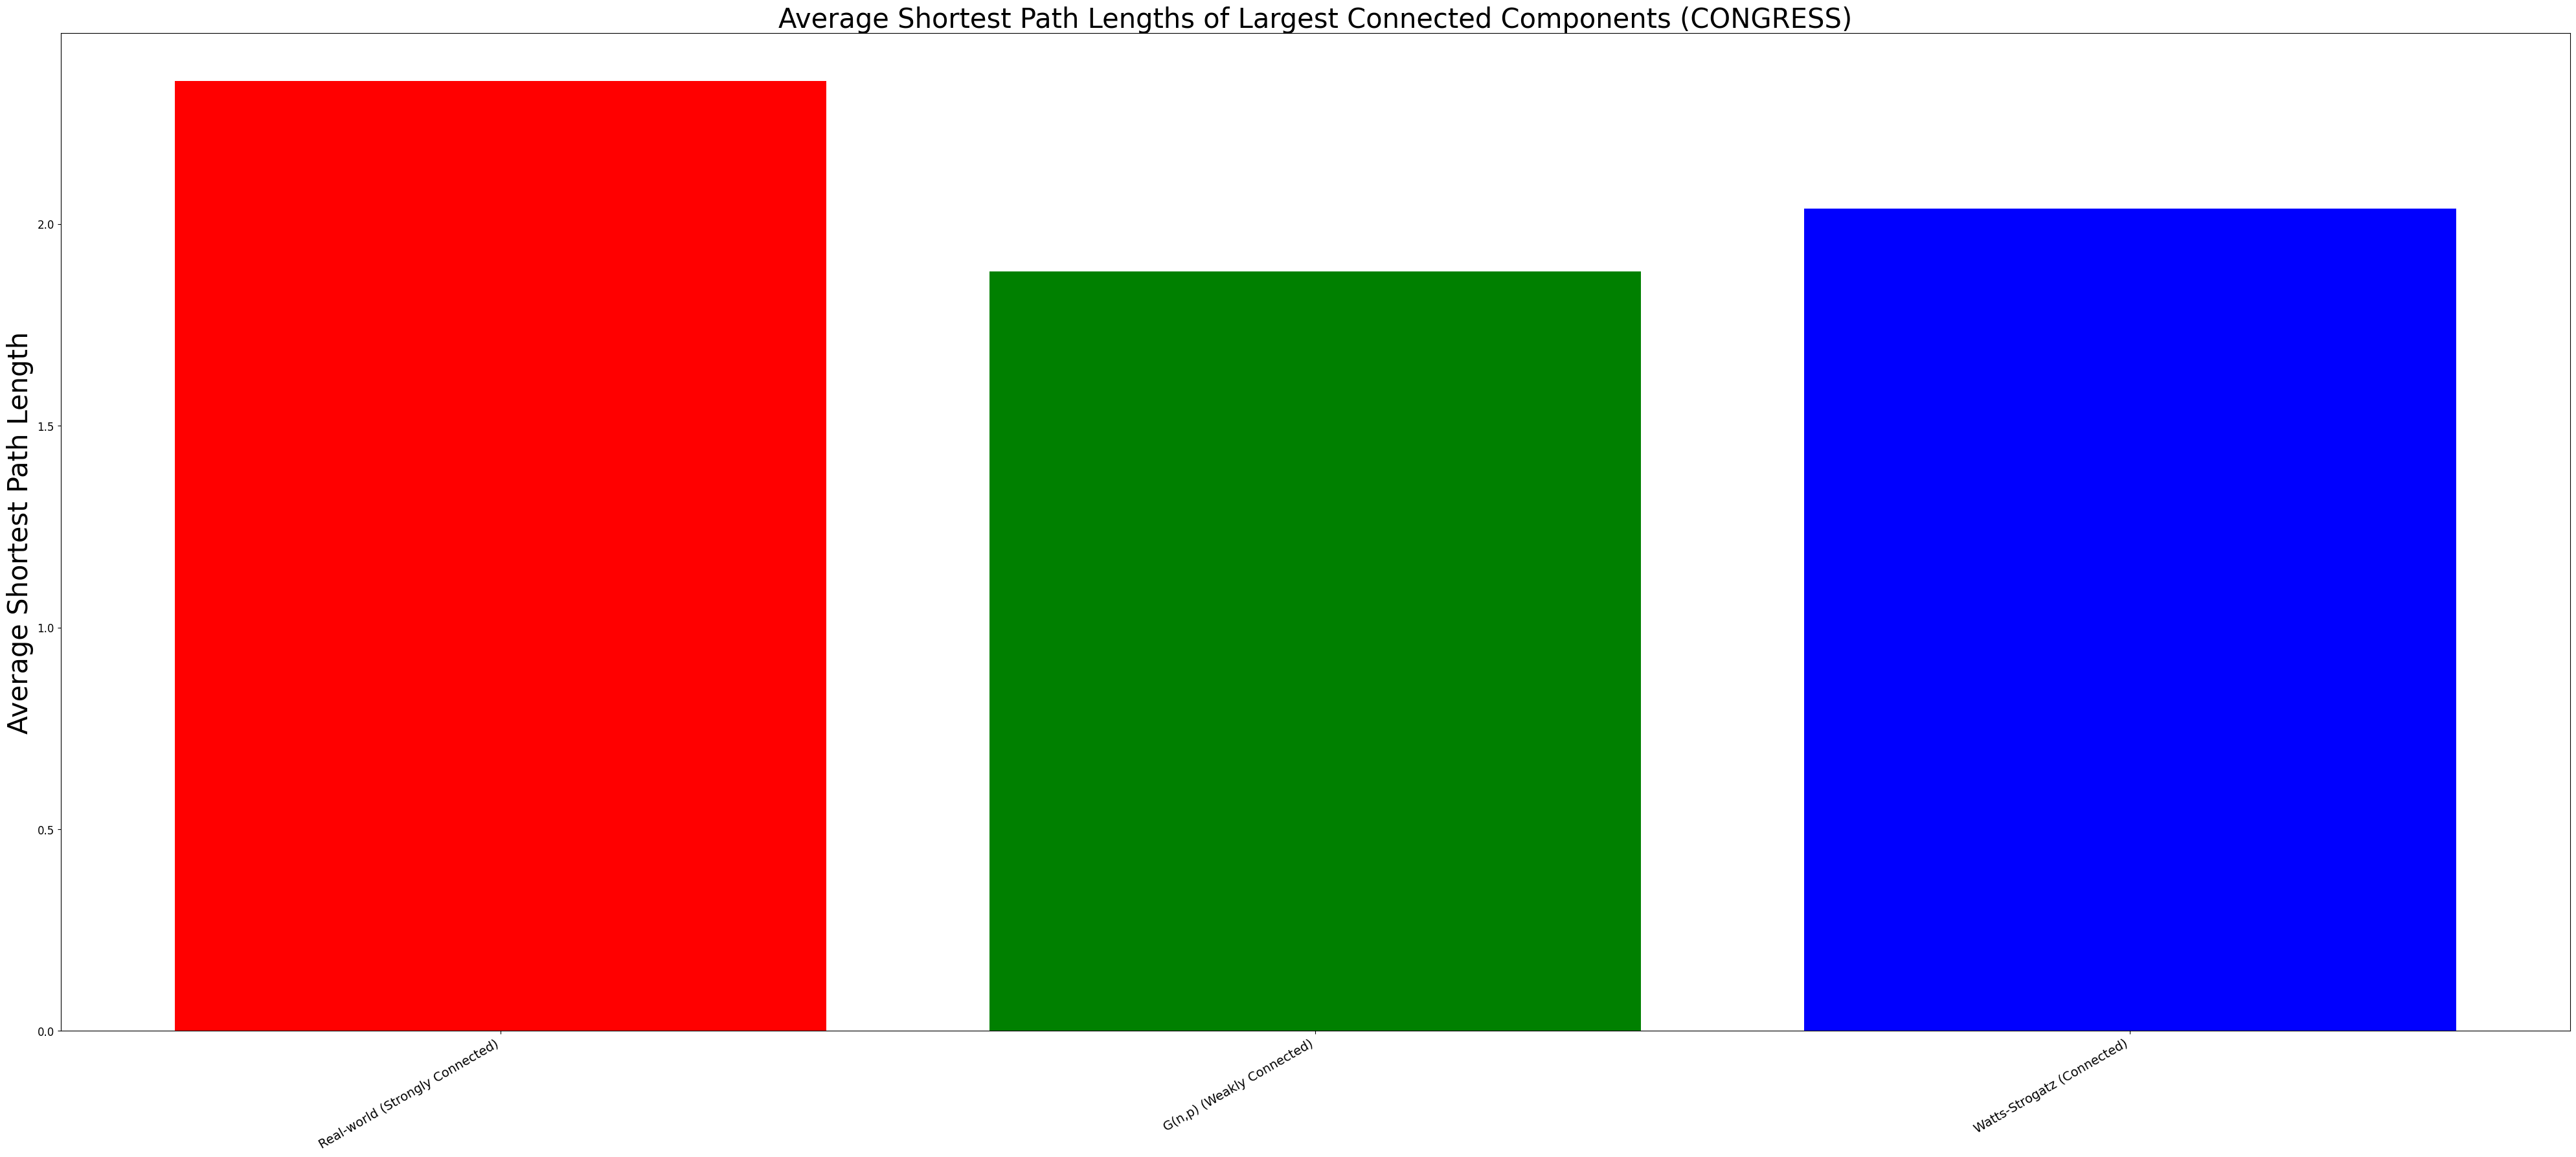

In [75]:
# Calculate average shortest path length for the largest strongly connected component
largest_strongly_connected_component = max(nx.strongly_connected_components(congress_G), key=len)
average_path_length_congress_G = nx.average_shortest_path_length(congress_G.subgraph(largest_strongly_connected_component))

# Calculate average shortest path length for the largest weakly connected component
largest_weakly_connected_component = max(nx.weakly_connected_components(congress_G), key=len)
average_path_length_congress_Gnp = nx.average_shortest_path_length(congress_Gnp.subgraph(largest_weakly_connected_component))

# Calculate average shortest path length for the largest connected component
largest_connected_component = max(nx.connected_components(congress_watts), key=len)
average_path_length_congress_watts = nx.average_shortest_path_length(congress_watts.subgraph(largest_connected_component))

print("Average path length of the largest strongly connected component of the real-world congress graph is:", average_path_length_congress_G)
print("Average path length of the largest weakly connected component of G(n,p) congress graph is:", average_path_length_congress_Gnp)
print("Average path length of the largest connected component of the Watts-Strogatz congress graph is:", average_path_length_congress_watts)

# Data for the histogram
labels = ['Real-world (Strongly Connected)', 'G(n,p) (Weakly Connected)', 'Watts-Strogatz (Connected)']
values = [average_path_length_congress_G, average_path_length_congress_Gnp, average_path_length_congress_watts]

# Plotting the histogram
plt.figure(figsize=(50, 20))

plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.ylabel('Average Shortest Path Length', fontsize=30)
plt.title('Average Shortest Path Lengths of Largest Connected Components (CONGRESS)', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=30, ha="right")
plt.show()

Average path length of the real-world facebook graph is :  3.6925068496963913
Average path length of the G(n,p) facebook graph is :  2.6021102325628735
Average path length of the Watts-Strogatz facebook graph is :  4.139765812304769


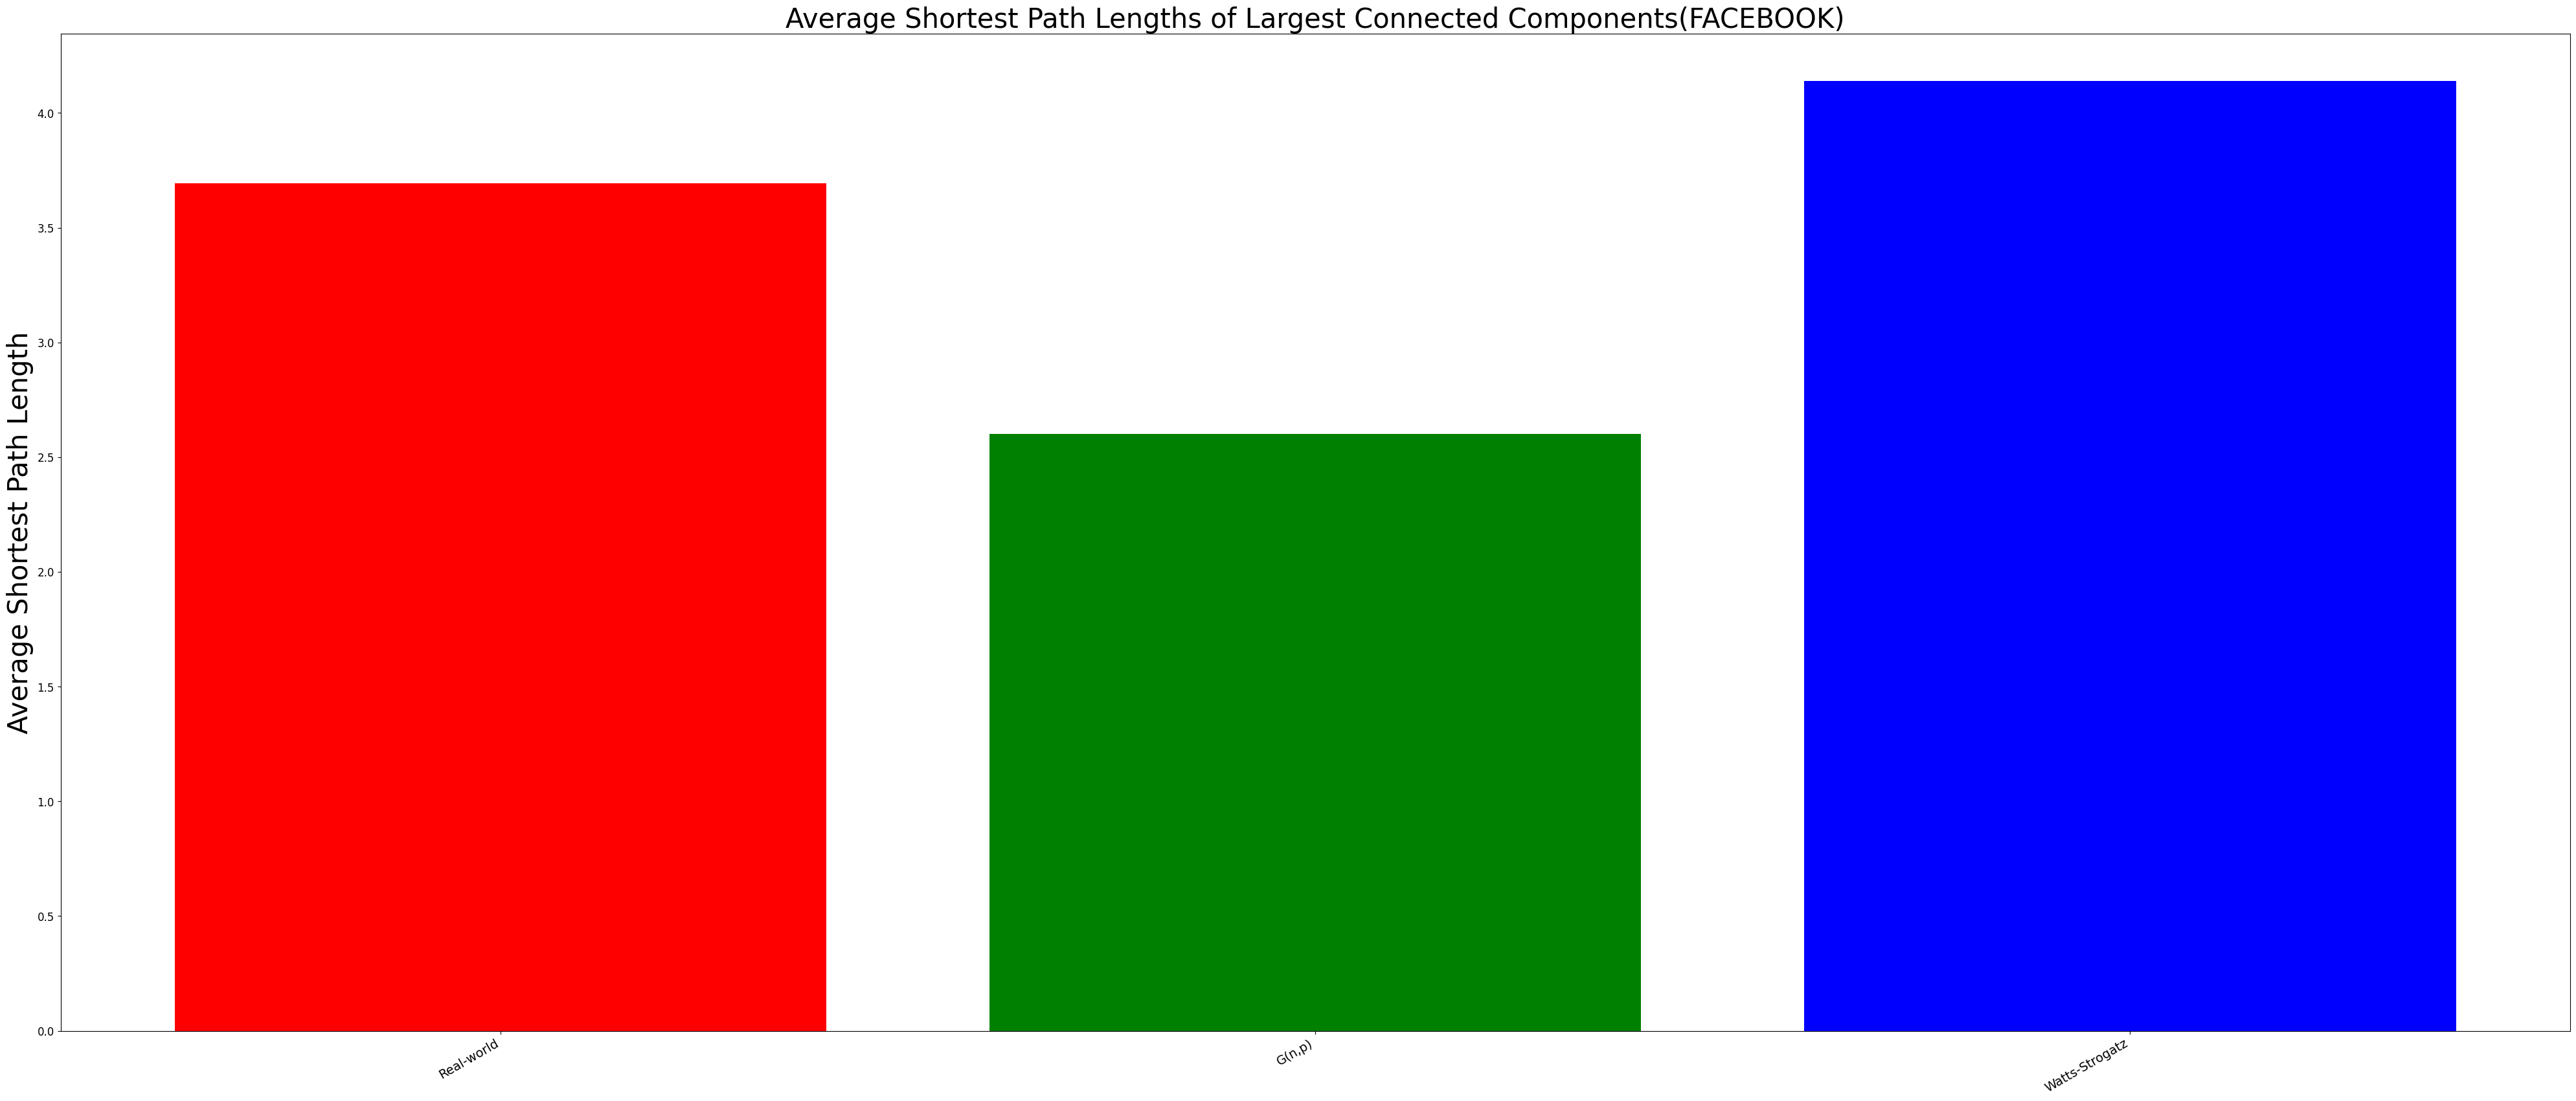

In [76]:
average_path_length_facebook_G = nx.average_shortest_path_length(facebook_G)
average_path_length_facebook_Gnp = nx.average_shortest_path_length(facebook_Gnp)
average_path_length_facebook_watts = nx.average_shortest_path_length(facebook_watts)

print("Average path length of the real-world facebook graph is : ", average_path_length_facebook_G)
print("Average path length of the G(n,p) facebook graph is : ", average_path_length_facebook_Gnp)
print("Average path length of the Watts-Strogatz facebook graph is : ", average_path_length_facebook_watts)


# Data for the histogram
labels = ['Real-world', 'G(n,p)', 'Watts-Strogatz']
values = [average_path_length_facebook_G, average_path_length_facebook_Gnp, average_path_length_facebook_watts]

# Plotting the histogram
plt.figure(figsize=(50, 20))

plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.ylabel('Average Shortest Path Length', fontsize=30)
plt.title('Average Shortest Path Lengths of Largest Connected Components(FACEBOOK)', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=30, ha="right")
plt.show()

Average path length of the largest connected component of the real-world Email graph is: 5.653168420843987
Average path length of the largest connected component of G(n,p) Email graph is: 8.735421386125612
Average path length of the largest connected component of the Watts-Strogatz Email graph is: 276.53126399873145


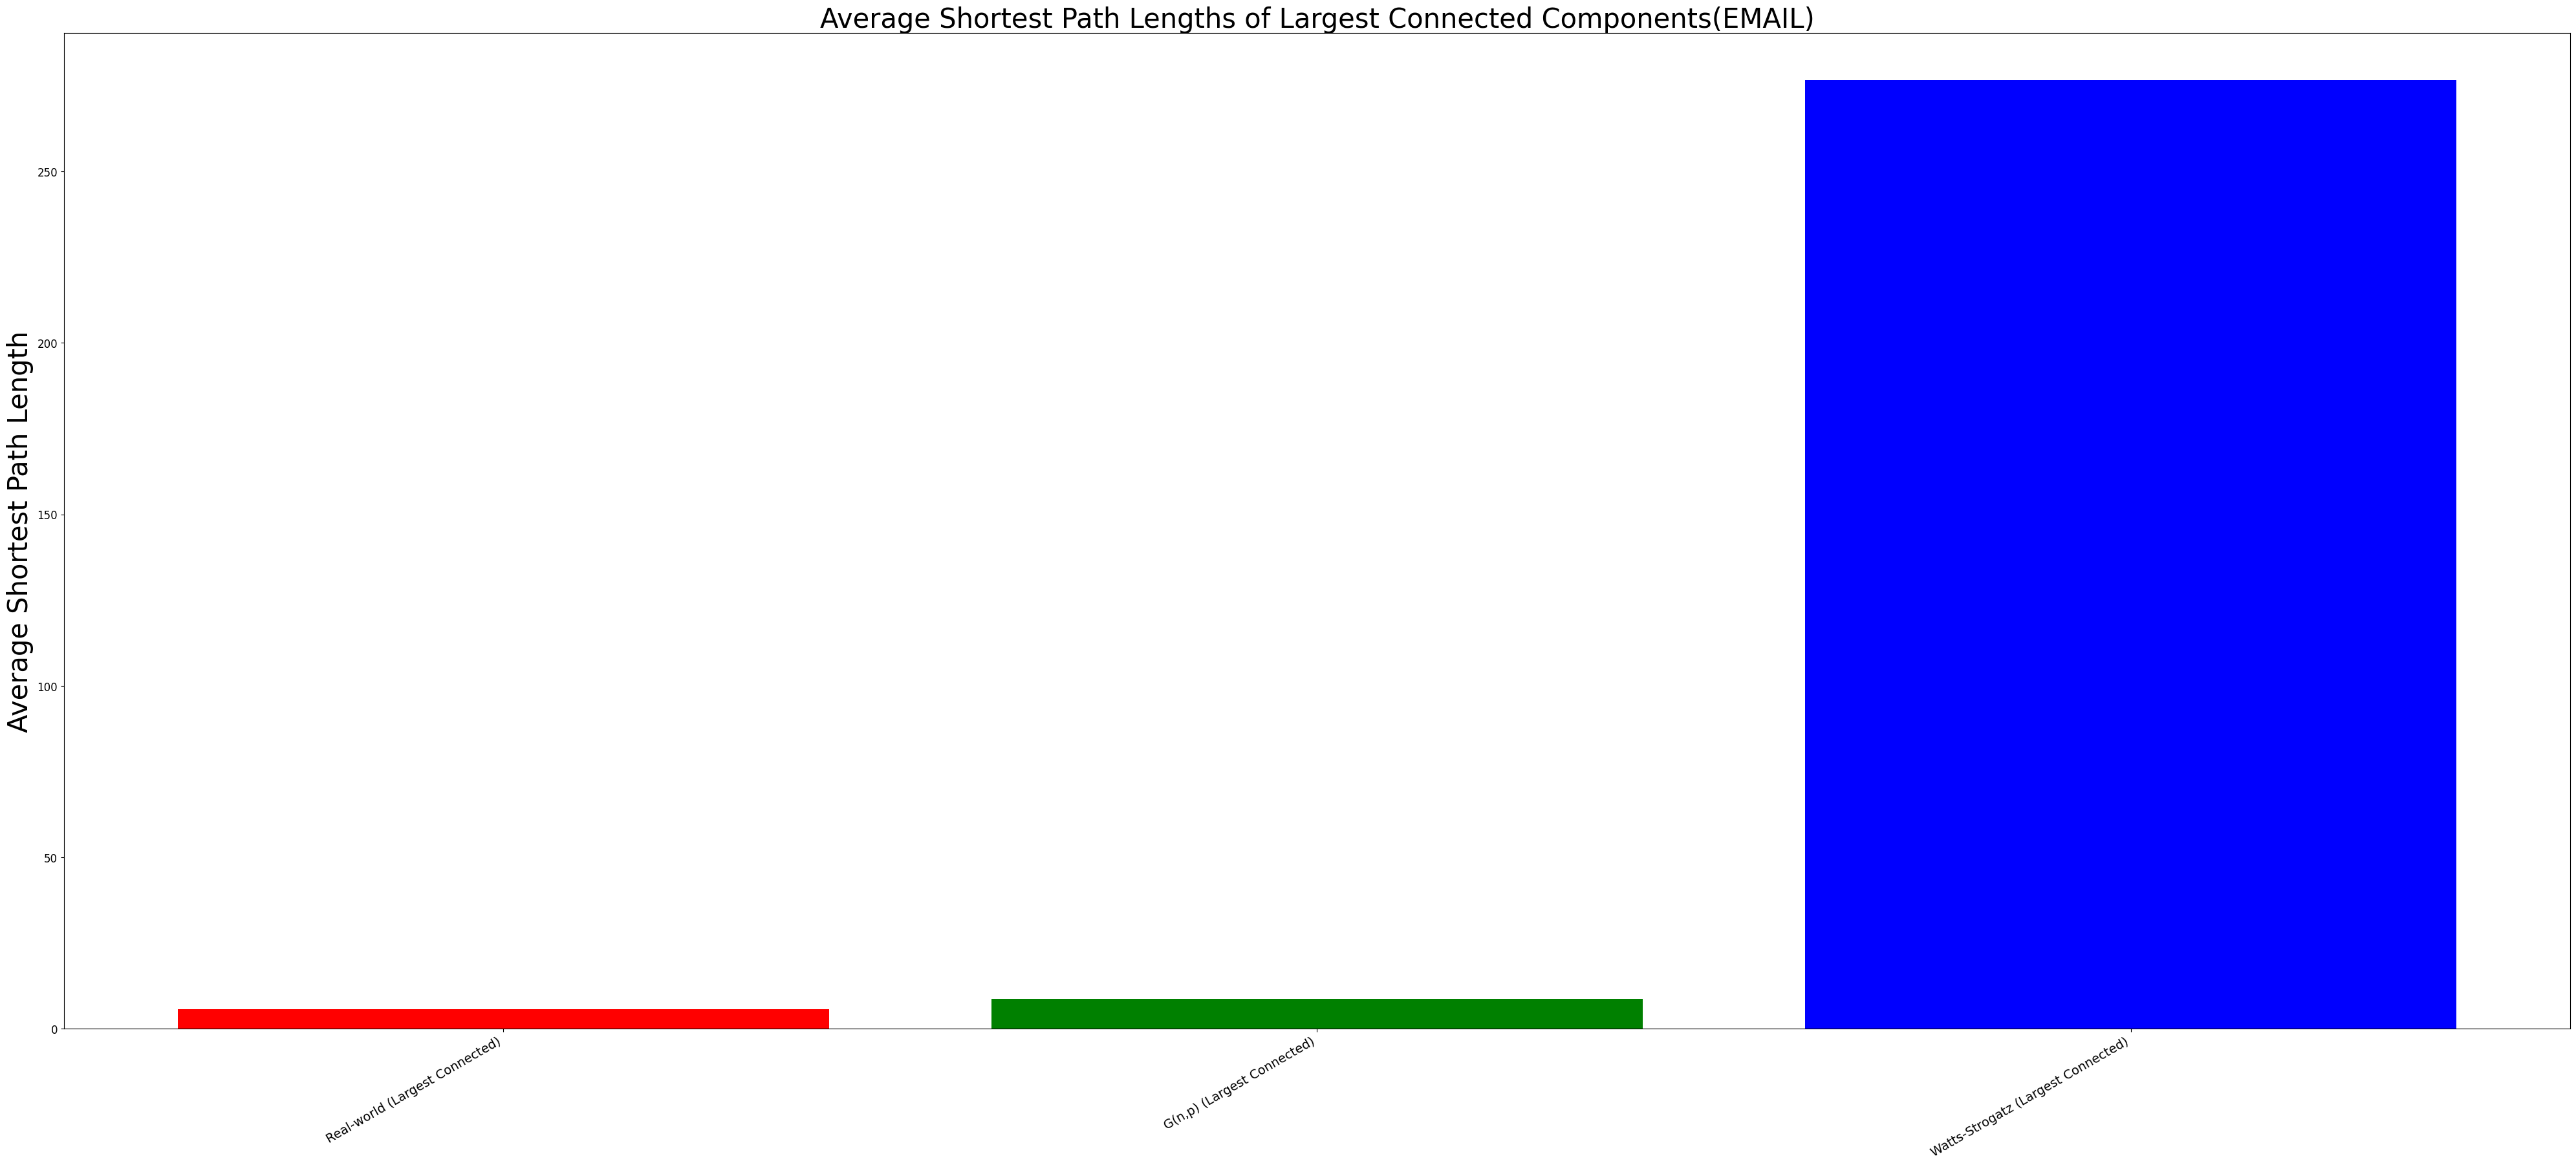

In [77]:
# Calculate average path length for the largest connected component
largest_connected_component = max(nx.connected_components(email_G), key=len)
average_path_length_email_G = nx.average_shortest_path_length(email_G.subgraph(largest_connected_component))

# Calculate average path length for the largest connected component
largest_connected_component_Gnp = max(nx.connected_components(email_Gnp), key=len)
average_path_length_email_Gnp = nx.average_shortest_path_length(email_Gnp.subgraph(largest_connected_component_Gnp))

# Calculate average path length for the largest connected component
largest_connected_component_watts = max(nx.connected_components(email_watts), key=len)
average_path_length_email_watts = nx.average_shortest_path_length(email_watts.subgraph(largest_connected_component_watts))

print("Average path length of the largest connected component of the real-world Email graph is:", average_path_length_email_G)
print("Average path length of the largest connected component of G(n,p) Email graph is:", average_path_length_email_Gnp)
print("Average path length of the largest connected component of the Watts-Strogatz Email graph is:", average_path_length_email_watts)

# Data for the histogram
labels = ['Real-world (Largest Connected)', 'G(n,p) (Largest Connected)', 'Watts-Strogatz (Largest Connected)']
values = [average_path_length_email_G, average_path_length_email_Gnp, average_path_length_email_watts]

# Plotting the histogram
plt.figure(figsize=(50, 20))

plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.ylabel('Average Shortest Path Length', fontsize=30)
plt.title('Average Shortest Path Lengths of Largest Connected Components(EMAIL)', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=30, ha="right")
plt.show()

## Summary of all the analysis

# Congress Graph

In [78]:
Nodes = nx.number_of_nodes(congress_G)
Edges = nx.number_of_edges(congress_G)
print("No of nodes:",Nodes , "\nNo of edges:",Edges)

No of nodes: 475 
No of edges: 13289


In [79]:
print("Average degree of real world graph:", round(average_degree_congress_G, 4))
print("Average degree of G(n,p) graph:", round(average_degree_congress_Gnp, 4))
print("Average degree of watts strogatz graph:", round(average_degree_congress_watts, 4))

Average degree of real world graph: 55.9537
Average degree of G(n,p) graph: 112.0968
Average degree of watts strogatz graph: 54.0


In [80]:
print("Average Degree Centrality value of real world graph:", sum(congress_G_Y)/len(congress_G_Y))
print("Average Degree Centrality value of G(n,p) graph:", sum(congress_Gnp_Y)/len(congress_Gnp_Y))
print("Average Degree Centrality value of watts strogatz graph:", sum(congress_watts_Y)/len(congress_watts_Y))

Average Degree Centrality value of real world graph: 0.22422040490798673
Average Degree Centrality value of G(n,p) graph: 0.11836235922204973
Average Degree Centrality value of watts strogatz graph: 0.5144986527839434


# Facebook Graph

In [81]:
Nodes = nx.number_of_nodes(facebook_G)
Edges = nx.number_of_edges(facebook_G)
print("No of nodes:",Nodes , "\nNo of edges:",Edges)

No of nodes: 4039 
No of edges: 88234


In [82]:
print("Average degree of real world graph:", round(average_degree_facebook_G, 4))
print("Average degree of G(n,p) graph:", round(average_degree_facebook_Gnp, 4))
print("Average degree of watts strogatz graph:", round(average_degree_facebook_watts, 4))

Average degree of real world graph: 43.691
Average degree of G(n,p) graph: 43.9525
Average degree of watts strogatz graph: 42.0


In [83]:
print("Average Degree Centrality value of real world graph:", sum(congress_G_Y)/len(congress_G_Y))
print("Average Degree Centrality value of G(n,p) graph:", sum(congress_Gnp_Y)/len(congress_Gnp_Y))
print("Average Degree Centrality value of watts strogatz graph:", sum(congress_watts_Y)/len(congress_watts_Y))

Average Degree Centrality value of real world graph: 0.22422040490798673
Average Degree Centrality value of G(n,p) graph: 0.11836235922204973
Average Degree Centrality value of watts strogatz graph: 0.5144986527839434


# Emali Graph

In [84]:
Nodes = nx.number_of_nodes(email_G)
Edges = nx.number_of_edges(email_G)
print("No of nodes:",Nodes , "\nNo of edges:",Edges)

No of nodes: 1005 
No of edges: 1006


In [85]:
print("Average degree of real world graph:", round(average_degree_email_G, 4))
print("Average degree of G(n,p) graph:", round(average_degree_email_Gnp, 4))
print("Average degree of watts strogatz graph:", round(average_degree_email_watts, 4))

Average degree of real world graph: 2.002
Average degree of G(n,p) graph: 1.998
Average degree of watts strogatz graph: 2.0


In [86]:
print("Average Degree Centrality value of real world graph:", sum(email_G_Y)/len(email_G_Y))
print("Average Degree Centrality value of G(n,p) graph:", sum(email_Gnp_Y)/len(email_Gnp_Y))
print("Average Degree Centrality value of watts strogatz graph:", sum(email_watts_Y)/len(email_watts_Y))

Average Degree Centrality value of real world graph: 0.0
Average Degree Centrality value of G(n,p) graph: 0.0014262023217247097
Average Degree Centrality value of watts strogatz graph: 0.0
